##### Final Project Submission
* Student Name: Kyunghwan William Kim
* Student Pace: Flex
* Scheduled Project Review Data/Time:
* Instructor Name: Abhineet Kulkarni

# SyriaTel Customer Churn Prediction

## Overview

The main focus of this project is to build a classifier to predict whether a customer will soon stop doing business with SyriaTel, a telecommunications company. The data set which was downloaded from Kaggle consists of 20 features and 3333 rows containing SyriaTel's churn metrics.The process outline initiates by identifying the top attributes of churn and then creating a final machine learning model to predict whether or not a customer will soon churn. Several machine learning models were created and their performances were compared to decide on a final predictive model that the stakeholder can use on their current database. 

## Business Understanding

SyriaTel is interested in reducing how much money is lost because of customers who don't stick around very long. The question to answer is: are there any predictable patterns here?

Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. The main contribution of our project is to develop a churn prediction model which assists telecom operators to predict customers who are most likely subject to churn.

## Method

The objective will be achieved by first assessing the feature importance on the below attributes and determining which tend to be the strongest predictors of churn. Then apply these attributes to several classification machine learning models to classify at risk customers in the present and in the future.

### Method Outline

1. After analyzing the data the project is identified as a classification problem.
2. The target variable 'churn' creates a binary classification.
3. For this instance the balance of the target variable will be investigated
4. Since the target variable is imbalanced, the Accuracy score will not be used, instead the Recall score will be more important due to the problem at hand. 

### Type Errors

The nature of this problem is framed by the fact that losing current customers is less expensive than gaining new customers. Therefore, it is much better to retain the customers that the company currently has rather than to acquire new customers.

Incorrectly classifying a false negative would pose a higher threat than a false positive because a false negative would mean that the reality of a customer canceling would have been overlooked. The occurrence of the false-negative occurring is referred to as a type two error. In order to rank the classifiers on how well they minimized false negatives, measurement of recall has been utilized.

### Definitions

##### Churn: 
business lost over a period of time. Churn rate is a measure of number of customers moving out of the business over a specific period.

##### Recall:
is a measure of how many relevant elements were detected. Therefore it divides true positives by the number of actual total positives. Indicates what percentage of the classes we're interested in were actually captured by the model.

## Exploratory Data Analysis

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style='darkgrid')
import plotly.express as px
from scipy import stats
from scipy.stats import norm
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, roc_curve, auc, make_scorer, precision_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("data.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Most of our features have a numeric datatype except for state, phone number, international plan, & voicemail plan.
Let's investigate these features to classify as either categorical or continuous.

### Cleaning and Preprocessing

##### Cleaning and Preprocessing Outline

1. Replace ' ' with '-'
2. Check for null and duplicated values
3. Inspect Unique values of columns to identify potential errors or null values
4. Convert all yes,no object values into integer values
5. Calculate the total_net_minutes, total_net_calls & total_net_charge to reduce the number of features
6. Drop all repeated features and irrelevant columns

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Featuress are not on the same scale, this may be a problem for models like K Nearest Neighbors, we can fix this by utilizing a StandardScaler or a MinMaxScaler in further steps.

#### Clean Up Column Headings

In [6]:
df.columns = df.columns.str.replace(' ', '_')

#### Check for null values

In [7]:
df.isna().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [8]:
#Check for duplicates
df.duplicated().sum()

0

It appears that there are no null values in the dataframe.

Most of the features are numerical except for state, phone_number, international_plan and voice_mail_plan which are strings and our target churn which is of boolean type.

Let's inspect the unique values of each feature to see if we have any 'null' values 'in disguise' or any values that we don't expect which might be errors:

In [9]:
#Inspect Unique values of columns to identify potential errors or null values
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('\n=============================================================\n')

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


account_length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243

  2.6  3.4  1.1 18.3 16.6  2.1  2.4  2.5]


total_intl_calls
[ 3  5  7  6  4  2  9 19  1 10 15  8 11  0 12 13 18 14 16 20 17]


total_intl_charge
[2.7  3.7  3.29 1.78 2.73 1.7  2.03 1.92 2.35 3.02 3.43 2.46 3.32 3.54
 1.46 3.73 2.19 3.51 2.86 1.54 2.57 2.08 2.78 4.19 3.97 3.   3.83 3.4
 3.19 2.24 3.92 2.84 2.54 3.94 2.48 0.95 2.3  3.56 2.   2.38 2.97 2.11
 1.84 3.08 2.51 2.62 2.75 2.16 1.57 3.27 3.24 3.13 2.21 1.67 1.97 1.65
 3.16 4.05 2.65 3.35 2.32 2.94 3.75 2.4  2.13 1.43 1.19 3.38 3.05 2.43
 2.59 3.59 5.4  1.94 1.73 3.81 3.86 1.86 3.11 4.27 3.46 4.37 0.   3.21
 2.67 2.27 2.92 3.62 2.89 4.75 1.27 0.73 3.65 3.48 3.89 2.81 1.81 4.16
 1.22 1.76 4.21 1.59 5.1  2.05 1.35 1.89 3.78 4.86 4.32 4.   1.   0.54
 1.3  4.13 1.62 3.67 4.64 4.73 1.51 4.91 0.97 4.46 1.24 1.38 1.11 4.4
 4.02 4.43 4.51 0.35 4.1  4.08 4.29 1.49 4.35 1.08 4.56 1.4  1.13 4.24
 4.59 1.05 1.03 0.59 4.62 1.32 4.83 4.67 4.97 4.81 1.16 0.78 0.84 0.89
 0.7  0.92 0.3  4.94 4.48 0.57 0.65 0.68]


customer_service_calls
[1 0 2 3

No values of surprise or suspision here.

* All states look normal, as expected.
* We can see that columns international_plan and voice_mail_plan are binary features with yes/no values - we might want to change these types later to booleans or 1/0.
* It is interesting to see that there are only 3 area_codes. It might be worth investigating whether a particular area code has higher churn than another or if it would be safe to simply drop area code. Also, area code would actually be more of a categorical feature rather than an int feature so we will change this data type.
* It would be safe to assume that phone_number has no bearing on whether a person decides to leave the company and so we might choose to drop this column.
* account_length appears to be discrete, with only integer values. The highest value being 243 suggests that this column represents the total number of days the cusomter has had their account open with the company. From the length of time, this dataset must contain relatively new cusomters.
* number_vmail_messages appears to be a discrete variable and there aren't abnormal values here. The highest number of voice mails is 51 which might be high for the average person but could be an indicator of churn so I feel it is worth keeping.
* customer_service_calls values are also a discrete variable as expected with no apparent abnormal values.
* All minutes, calls and charges columns have reasonable values and nothing stands out as unusual at this stage.
* And of course our target churn has just True/False values as expected.

#### Handling Categorical Variables

##### Cateogorical vs. Continuous Features

##### Categorical
* 'state' - Residing state of customer
* 'area code' - area code of customer
* 'international plan' - international plan included (y/n)
* 'voice mail plan' - voice mail plan included (y/n)

##### Continous
* 'account length' - duration of customer with business
* 'number vmail messages - number of voice mail messages
* 'total day minutes' - sum of daytime minutes
* 'total day calls' - sum of daytime calls
* 'total day charge' - sum of daytime charges
* 'total eve minutes' - sum of evening minutes
* 'total eve calls' - sum of evening calls
* 'total eve charge' - sum of evening charges
* 'total night minutes' - sum of nighttime minutes
* 'total night calls' - sum of nighttime calls
* 'total night charge' - sum of nighttime charges
* 'total intl minutes' - sum of international minutes
* 'total intl calls' - sum of international calls
* 'total intl charge' - sum of international charges
* 'number customer service calls' - number of customer service calls

In [10]:
#Change object datatypes to numeric
#International Plan
df.international_plan.replace(('yes', 'no'), (1, 0), inplace = True)

In [11]:
#Voicemail Plan
df.voice_mail_plan.replace(('yes', 'no'), (1, 0), inplace = True)

In [12]:
df.state = df.state.astype('category')

#### Drop irrelevant features

In [13]:
# phone numbers are private information and they may not have a large impact on the model
df = df.drop(columns='phone_number')

### Investigate Features

#### Churn

In [14]:
#Explore Target Value: Churn
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [15]:
#Change object datatypes to numeric
df.churn.replace((True, False), (1, 0), inplace = True)

In [16]:
#Check Churn Percentages
df['churn'].value_counts(normalize=True) * 100

0    85.508551
1    14.491449
Name: churn, dtype: float64

In [17]:
churn_rate = round(sum(df.churn) / len(df.churn) * 100, 2)
print('Churn Rate: {0}%'.format(churn_rate))

Churn Rate: 14.49%


<AxesSubplot:xlabel='churn', ylabel='count'>

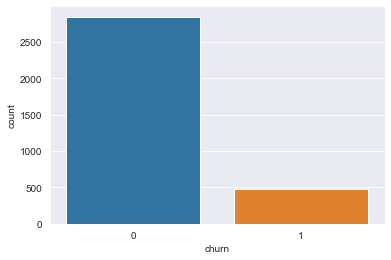

In [18]:
#Visualization - 'churn'
sns.countplot(x = 'churn',data = df)

There appears to be some class imbalance in our target variable. This could lead to the minority class, churned clients, not being properly represented in the model. Lets address this using SMOTE to ensure that the minority class is well accounted for.

SMOTE stands for Synthetic Minority Oversampling. Here, the algorithm generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases

#### State

<AxesSubplot:xlabel='state'>

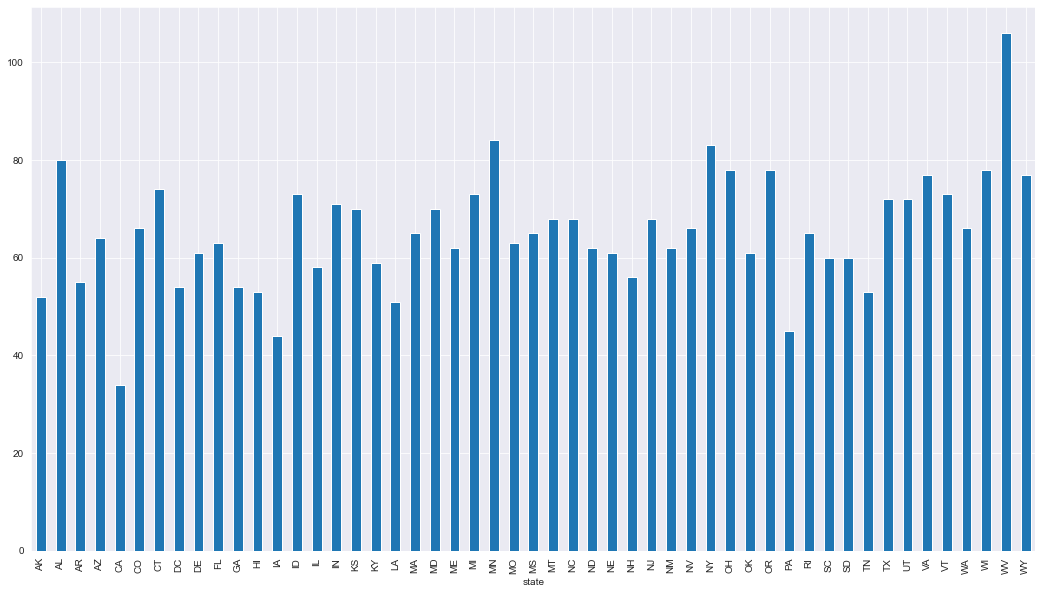

In [19]:
#Visualization - 'state'
fig,ax = plt.subplots(figsize = (18,10)) 
x = df.groupby('state')[['churn']].size()
x.plot.bar()

In [20]:
churn_by_state = df.groupby('state')['churn'].value_counts(normalize=True)
churn_by_state = pd.DataFrame(churn_by_state)
churn_by_state.columns = ['value']
churn_by_state = churn_by_state.reset_index()

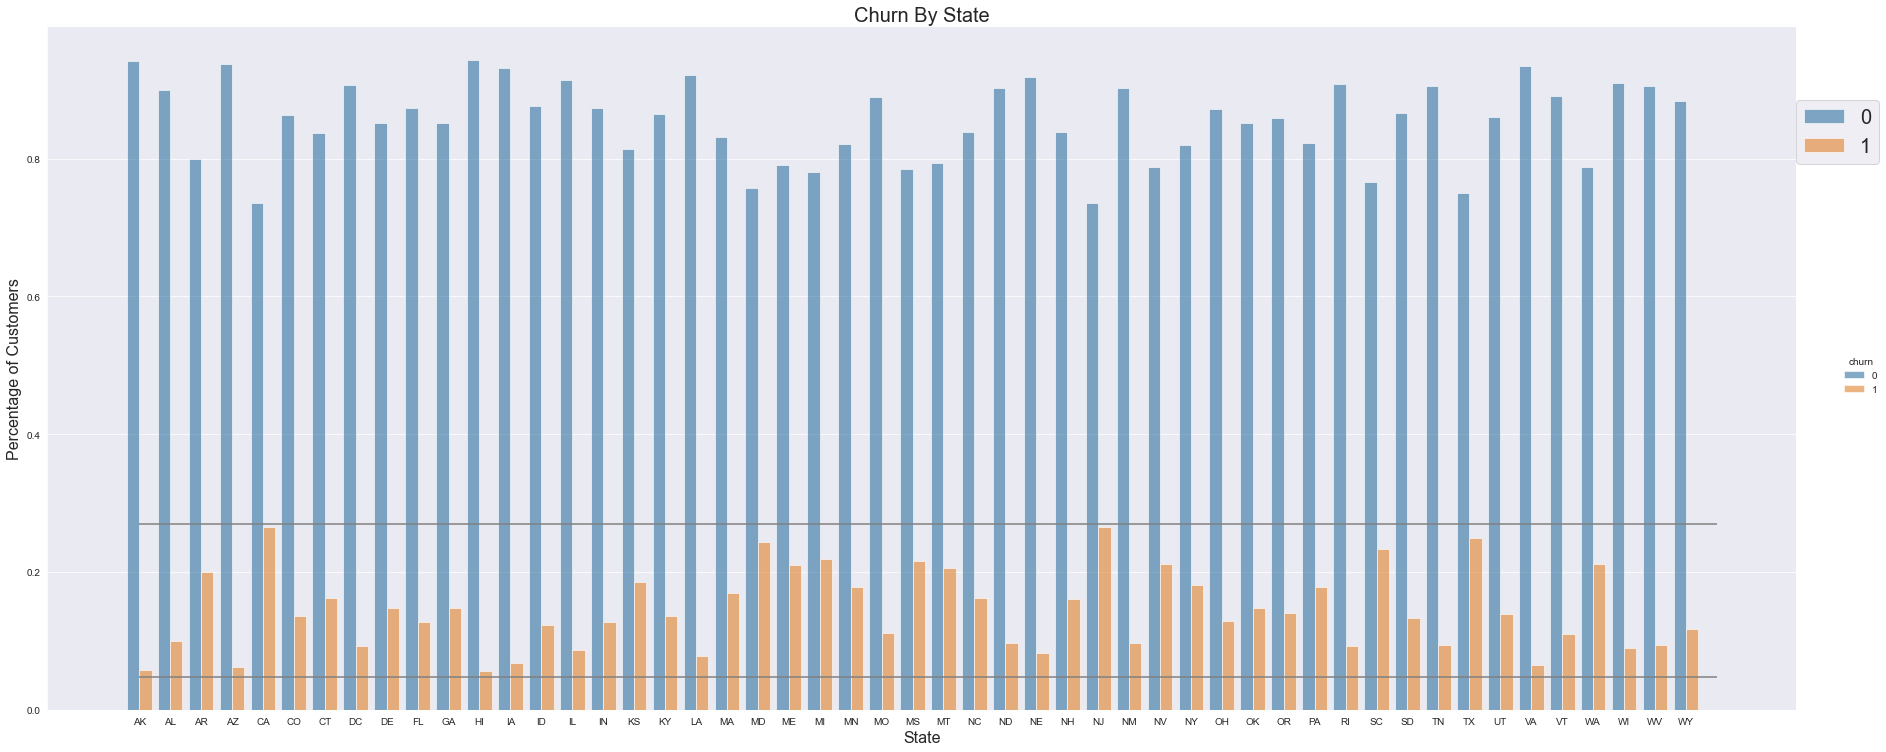

<Figure size 432x288 with 0 Axes>

In [21]:
# Plot
sns.catplot(data=churn_by_state, kind='bar',
            x='state', y='value', hue='churn', 
            alpha=.6, height=10, aspect=2.5)

# Graph details
plt.title('Churn By State', fontsize=20)
plt.ylabel('Percentage of Customers', fontsize=16)
plt.xlabel('State', fontsize=16)
plt.legend(loc=(1, .8), fontsize=20)

# hlines on highest and lowest churns
plt.hlines(y=.27, xmin=0, xmax=51, color='gray')
plt.hlines(y=.048, xmin=0, xmax=51, color='gray')

plt.show()
plt.savefig('Churn by State');

In [22]:
churn_by_state.loc[(churn_by_state['value'] >= .25) & (churn_by_state['churn'] == 1)]

,state,churn,value
9,CA,1,0.264706
63,NJ,1,0.264706
87,TX,1,0.250000


In [23]:
churn_by_state.loc[churn_by_state['value'] <= .06]

,state,churn,value
1,AK,1,0.057692
23,HI,1,0.056604


It is clear that there are certain states with much higher churn. When grouped by state, California, New Jersey, and Texas have the highest churn than any other state. States with the least churn include Arkansas and Hawaii.

#### Account Length

In [24]:
#Descriptive Statistics of 'Account_Length'
df['account_length'].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

The max account duration was 243 months, and the average account length was 101 months.

<AxesSubplot:xlabel='account_length', ylabel='Count'>

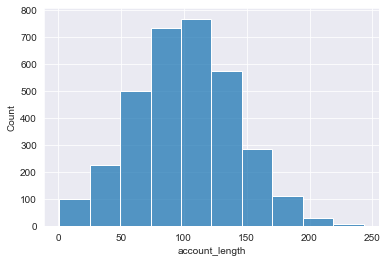

In [25]:
sns.histplot(df['account_length'], bins=10)

##### Facet Function (to compare features vs churn)

In [26]:
def facet(data,y):
    p = sns.FacetGrid(data,col = 'churn',size = 5)
    p.map(plt.hist,y,alpha = 0.5)
    p.add_legend()
    plt.show()

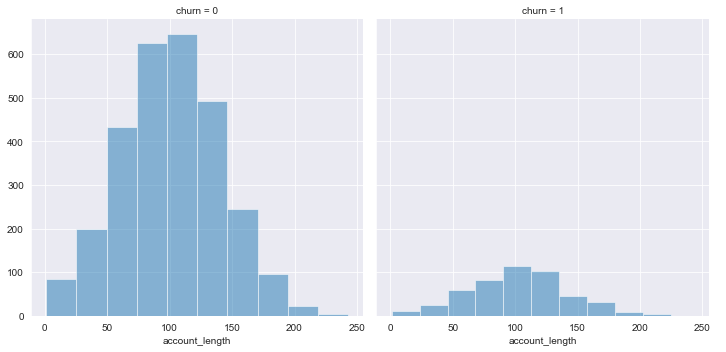

In [27]:
facet(df,'account_length')

Most of the customers had the service for between 50 to 150 months

#### Area Code

In [28]:
df['area_code'].value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

In [29]:
df['area_code'].value_counts(normalize=True) * 100

415    49.654965
510    25.202520
408    25.142514
Name: area_code, dtype: float64

Approximately half of the customers use the area code 415. Even though there are 51 states in our data sets, there are only three area code. We can investigate further in later steps.

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


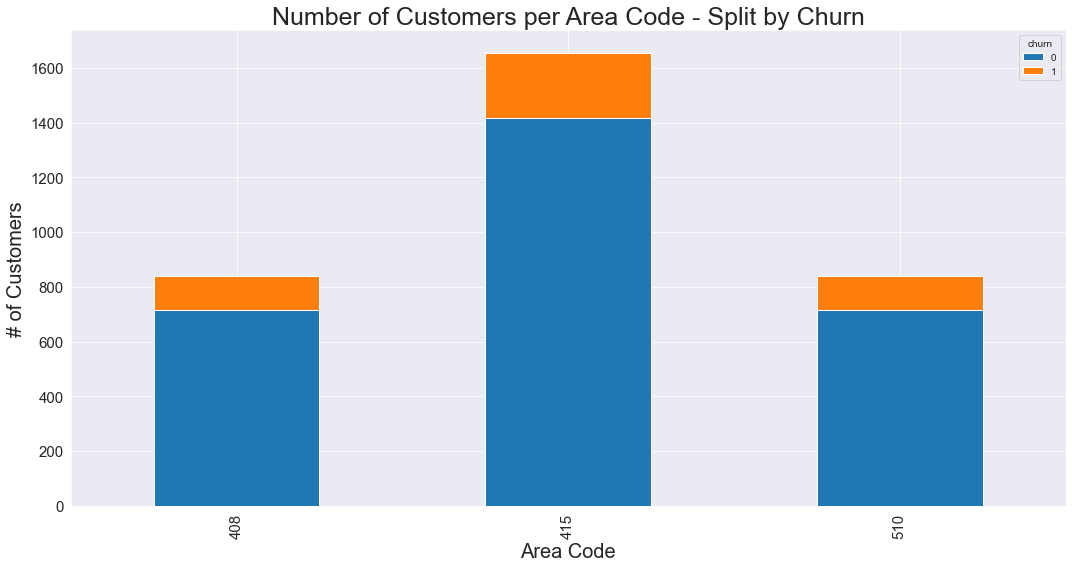

In [30]:
# percentage of churn by area code
print(df.groupby(["area_code"])['churn'].mean())

fig, ax = plt.subplots(figsize = (15, 8))
df.groupby(['area_code', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax = ax);
plt.title('Number of Customers per Area Code - Split by Churn', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Area Code', fontsize = 20)
plt.ylabel('# of Customers', fontsize = 20)
plt.tight_layout()
plt.savefig('Customers_Per_Area_Code');

We can see here that customer churn is a consistent rate of roughly 14-15% across all three area codes. Area code 415 has the highest number of customers but still churns the same rate as the other two area codes. For this reason, we might choose to drop area code from  the dataset.

#### International Calls

In [31]:
df['international_plan'].value_counts()

0    3010
1     323
Name: international_plan, dtype: int64

In [32]:
df['international_plan'].value_counts(normalize=True) * 100

0    90.309031
1     9.690969
Name: international_plan, dtype: float64

About 9.7% of customers had the international plan

In [33]:
# Are there any customers which made international calls without an internation plan?
print(df[df['total_intl_calls'] > 0]['international_plan'].unique())

# Answer: Yes, there were customers which didn't have an international plan, but made international calls

num_cust_intl_calls_without_plan = len(df[(df['total_intl_calls'] > 0) & (df['international_plan'] == 0)])
num_cust_made_intl_calls = len(df[df['total_intl_calls'] > 0])
print('Percentage of customers which made international calls but didn\'t have a plan: {:.2f}%'.format(num_cust_intl_calls_without_plan / num_cust_made_intl_calls * 100))

[0 1]
Percentage of customers which made international calls but didn't have a plan: 90.26%


Seems like SyriaTel did not market its international call plan effectively.
90% of the customers calling internationally did not have the plan.
But, it might be possible that most customers made international calls rarely, which would explain the no-plan scenario. Let's check the distribution of international call minutes.

<AxesSubplot:xlabel='total_intl_calls', ylabel='Count'>

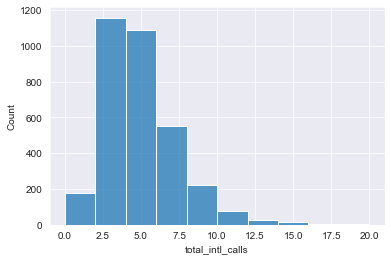

In [34]:
sns.histplot(df['total_intl_calls'], bins=10)

Most of the customer made 2 to 6 international calls in total in their subscription period. This explains the high 90% of customers making international calls without a plan.

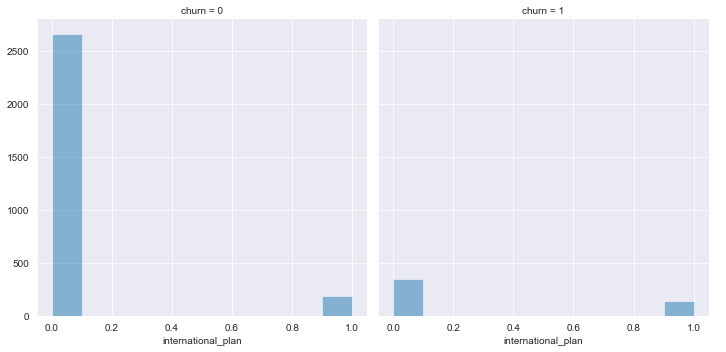

In [35]:
facet(df,'international_plan')

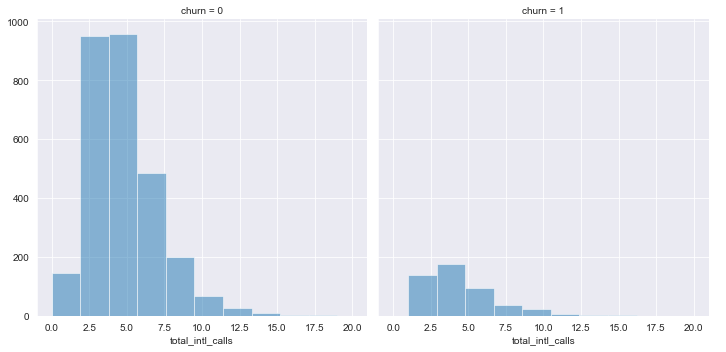

In [36]:
facet(df,'total_intl_calls')

#### Customer Service Calls

<AxesSubplot:>

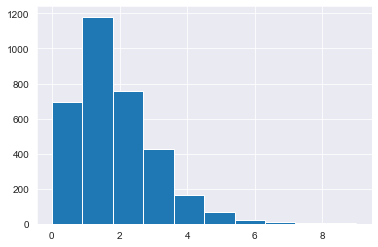

In [37]:
df['customer_service_calls'].hist()

In [38]:
df.groupby('churn')['customer_service_calls'].count()

churn
0    2850
1     483
Name: customer_service_calls, dtype: int64

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: customer_service_calls, dtype: object

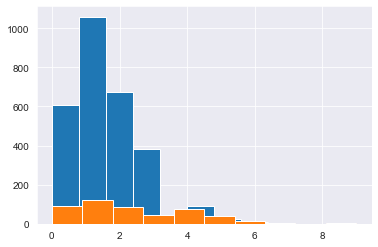

In [39]:
df.groupby('churn')['customer_service_calls'].hist()

In [40]:
df['customer_service_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64

In [41]:
df['customer_service_calls'].value_counts(normalize=True) * 100

1    35.433543
2    22.772277
0    20.912091
3    12.871287
4     4.980498
5     1.980198
6     0.660066
7     0.270027
9     0.060006
8     0.060006
Name: customer_service_calls, dtype: float64

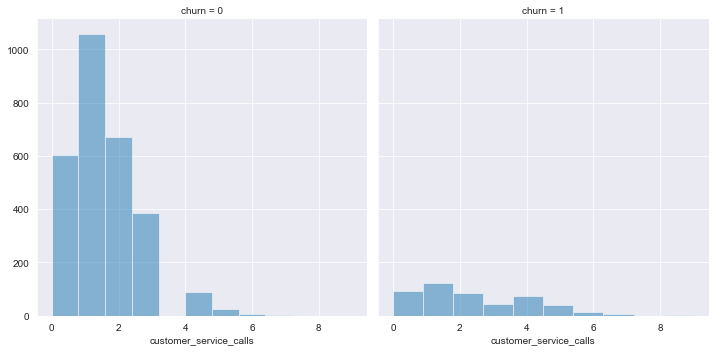

In [42]:
facet(df,'customer_service_calls')

In [43]:
customer_service = df.groupby('customer_service_calls')['churn'].agg(['count'])
customer_service

,count
customer_service_calls,
0,697
1,1181
2,759
3,429
4,166
5,66
6,22
7,9
8,2


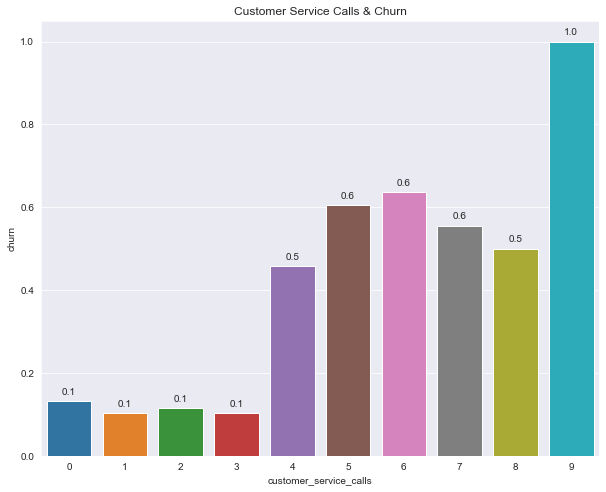

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='customer_service_calls', y='churn',
                    data=df, ci=None)
# Add annotations to bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Customer Service Calls & Churn')
plt.show()
plt.savefig('Customer_Service_Calls_Churn');

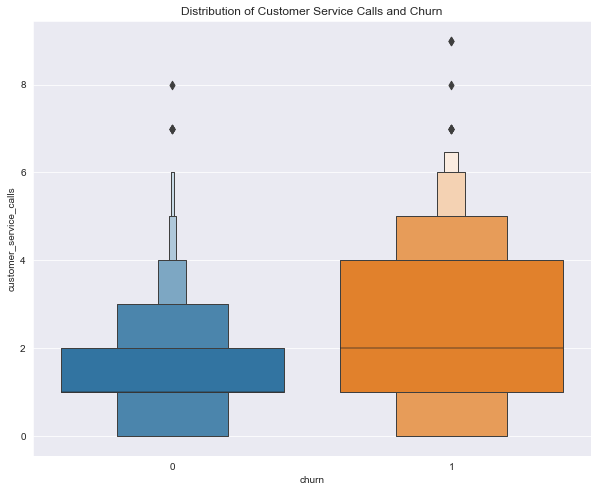

In [45]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x='churn', y='customer_service_calls',
              data=df)

plt.title('Distribution of Customer Service Calls and Churn')
plt.show()

In [46]:
# create a new data frame with only the clients who churned
df_churned = df[df.churn != 0]
df_churned.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
10,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,0,0,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,0,0,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,1,1,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1


In [47]:
df_churned.shape

(483, 20)

In [48]:
# churn rate for clients making 4 or more calls to customer service
sum(df_churned['customer_service_calls'] >= 4) / sum(df['customer_service_calls'] >= 4)

0.5168539325842697

Our current churn rate for the training data set is about 14.5%. When we look at customer service calls, we can see that as the number of customer service calls increases, the likelihood of churning increases as well. Specifically, with at least 4 customer service calls, the likelihood of a customer churning increases from about 10% to 50%.

Customer service calls alone cannot guarantee that a customer will churn. In fact, the majority of customers who DID NOT churn made 1-2 customer service calls. However, it is important to note that the majority people who DID churn made 1-4 calls to customer service. Therefore, more than 3 calls to customer service should be a red flag that a customer is more likely to churn.

#### Voice Mail Plan

In [49]:
df['voice_mail_plan'].value_counts()

0    2411
1     922
Name: voice_mail_plan, dtype: int64

In [50]:
df['voice_mail_plan'].value_counts(normalize=True) * 100

0    72.337234
1    27.662766
Name: voice_mail_plan, dtype: float64

About 27.6% of customers had the voice mail plan

In [51]:
df_churned['voice_mail_plan'].value_counts(normalize=True) * 100

0    83.436853
1    16.563147
Name: voice_mail_plan, dtype: float64

In [52]:
df['number_vmail_messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: number_vmail_messages, dtype: float64

The maximum number of voice mails was 51, which is quite high, compared to the average which was 8.

In [53]:
# Are there any customers which had voice message but didn't have a voice mail plan?
df[df['number_vmail_messages'] > 0]['voice_mail_plan'].unique()

array([1], dtype=int64)

No customers had a voice messages but didn't have a plan

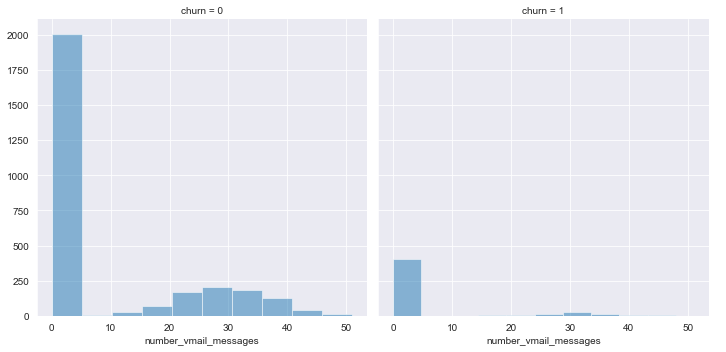

In [54]:
facet(df, 'number_vmail_messages')

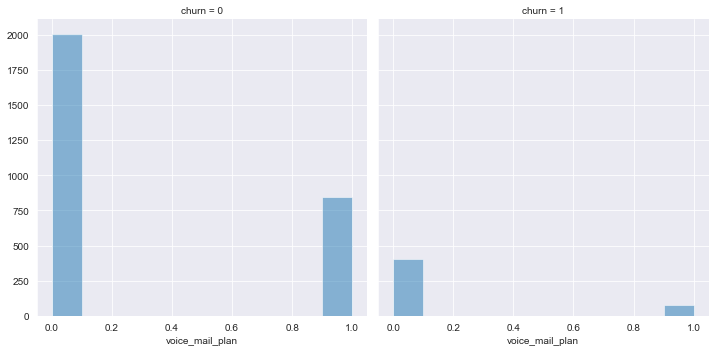

In [55]:
facet(df,'voice_mail_plan')

#### Charges for Minutes & Calls
How much are customers being charged and is it relevant to churn?

In [56]:
# Assess cost per minute for each call category
df['cost_per_day_call'] = df['total_day_charge'] / df['total_day_minutes']
df['cost_per_intl_call'] = df['total_intl_charge'] / df['total_intl_minutes']
df['cost_per_night_call'] = df['total_night_charge'] / df['total_night_minutes']
df['cost_per_eve_call'] = df['total_eve_charge'] / df['total_eve_minutes']

night_call_per_min = np.mean(df['cost_per_night_call'])
eve_call_per_min = np.mean(df['cost_per_eve_call'])
intl_call_per_min = np.mean(df['cost_per_intl_call'])
day_call_per_min = np.mean(df['cost_per_day_call'])

print(f'Day Cost/Min: ${round(day_call_per_min, 2)}')
print(f'Night Cost/Min: ${round(night_call_per_min, 2)}')
print(f'Eve Cost/Min: ${round(eve_call_per_min, 2)}')
print(f'International Cost/Min: ${round(intl_call_per_min, 2)}')

Day Cost/Min: $0.17
Night Cost/Min: $0.05
Eve Cost/Min: $0.09
International Cost/Min: $0.27


In [57]:
#Total Net Charge for all charges 
df['total_net_charge'] = df.total_day_charge + df.total_eve_charge + df.total_night_charge + df.total_intl_charge

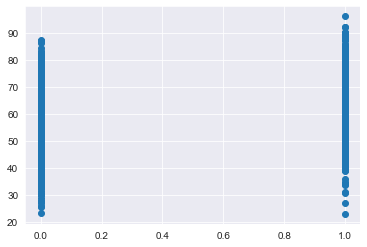

In [58]:
# scatter plot for total spend against churn
plt.scatter(x = df['churn'], y = df['total_net_charge'])

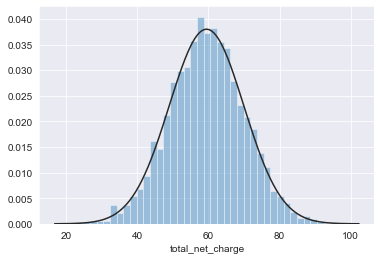

In [59]:
sns.distplot(df['total_net_charge'], fit=norm, kde=False)
plt.show()

In [60]:
#Calculate the total_net_minutes to reduce the number of features; we are going to do the same with calls, and charge
df['total_net_minutes'] = df.total_day_minutes + df.total_eve_minutes + df.total_night_minutes + df.total_intl_minutes

In [61]:
df['total_net_calls'] = df.total_day_calls + df.total_eve_calls + df.total_night_calls + df.total_intl_calls

In [62]:
df['total_net_charge'] = df.total_day_charge + df.total_eve_charge + df.total_night_charge + df.total_intl_charge

In [63]:
#Descriptive Statistics for total net minutes, charge & calls
df['total_net_minutes'].describe()

count    3333.000000
mean      591.864776
std        89.954251
min       284.300000
25%       531.500000
50%       593.600000
75%       652.400000
max       885.000000
Name: total_net_minutes, dtype: float64

In [64]:
df['total_net_charge'].describe()

count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: total_net_charge, dtype: float64

In [65]:
df['total_net_calls'].describe()

count    3333.000000
mean      305.137114
std        34.448164
min       191.000000
25%       282.000000
50%       305.000000
75%       328.000000
max       416.000000
Name: total_net_calls, dtype: float64

The average net minutes used by a customer was 591 minutes, the average net charged was 59 dollars, and the average net calls made by a customer was 305 calls.

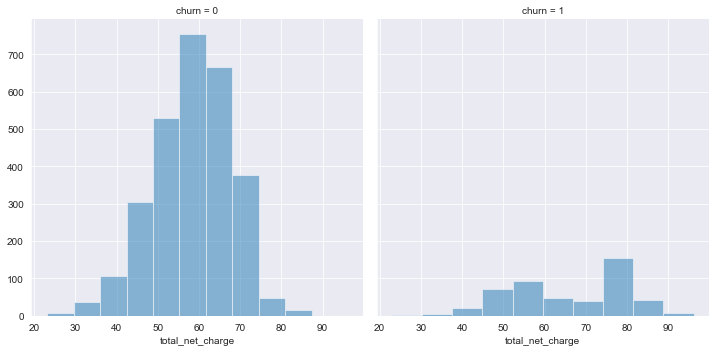

In [66]:
facet(df, 'total_net_charge')

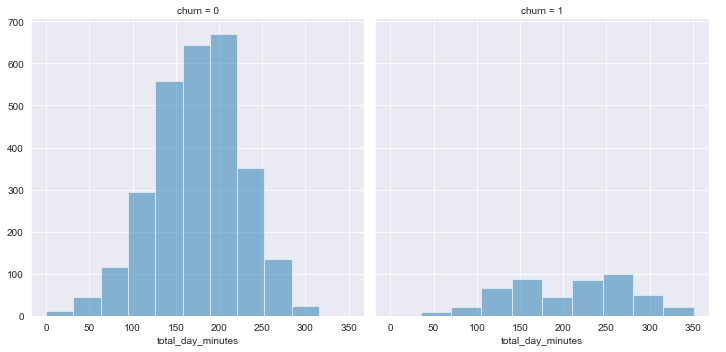

In [67]:
facet(df, 'total_day_minutes')

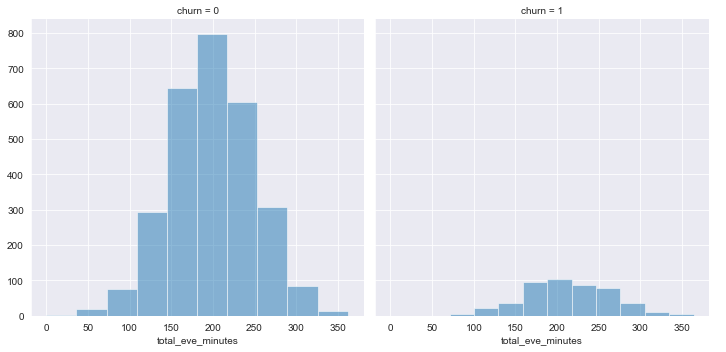

In [68]:
facet(df, 'total_eve_minutes')

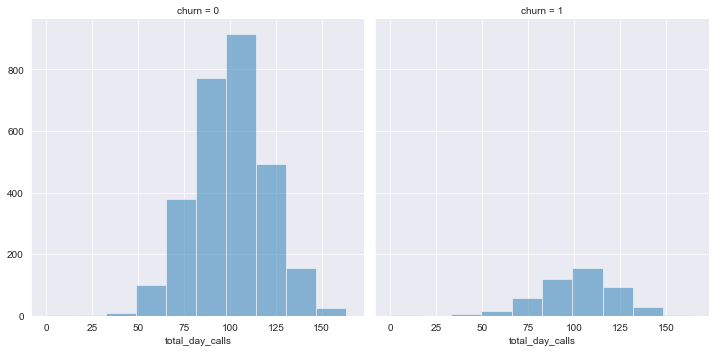

In [69]:
facet(df,'total_day_calls')

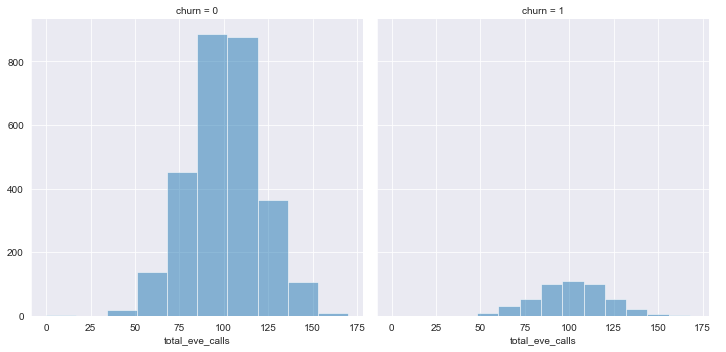

In [70]:
facet(df,'total_eve_calls')

In [71]:
# create a new data frame with only the clients who churned
df_churned = df[df.churn != 0]

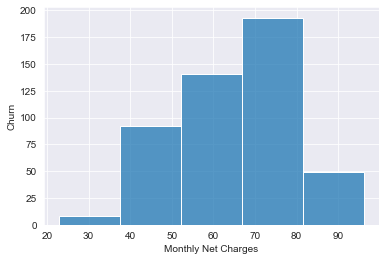

<Figure size 1080x576 with 0 Axes>

In [72]:
# visualize churn rate for net charge
sns.histplot(df_churned['total_net_charge'], bins=5)

plt.xlabel("Monthly Net Charges", size=10)
plt.ylabel("Churn", size=10)

plt.figure(figsize=(15,8))
plt.show()

In [73]:
# calculate churn rate for each bin in the histogram above
counts1, _ =  np.histogram(df['total_net_charge'], bins=5)

counts2, _ =  np.histogram(df_churned['total_net_charge'], bins=5)

day_churn_rate = counts2 / counts1
day_churn_rate

array([0.11428571, 0.12398922, 0.08169177, 0.26258503, 0.81666667])

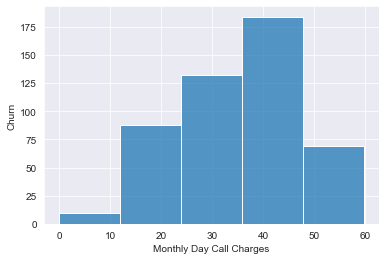

<Figure size 1080x576 with 0 Axes>

In [74]:
# visualize churn rate for day call charges only
sns.histplot(df_churned['total_day_charge'], bins=5)

plt.xlabel("Monthly Day Call Charges", size=10)
plt.ylabel("Churn", size=10)

plt.figure(figsize=(15,8))
plt.show()

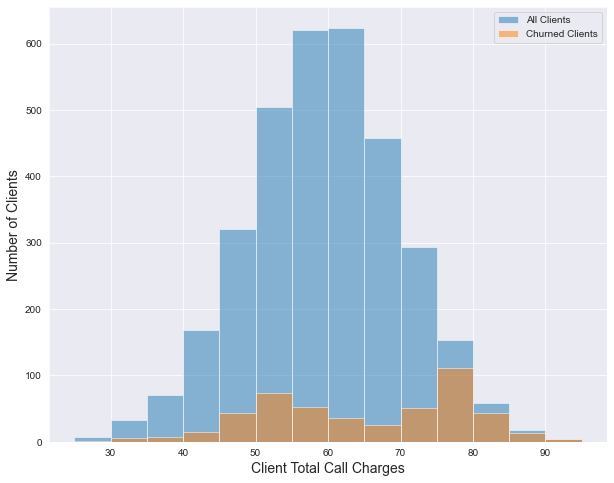

<Figure size 432x288 with 0 Axes>

In [75]:
# plot the proportion of churned clients by charges against the total number 
# of clients within each price range
plt.figure(figsize=(10,8))
plt.hist(
         df['total_net_charge'], 
         bins=range(25, 100, 5), 
         alpha=0.5, 
         label="All Clients"
)
plt.hist(
         df_churned['total_net_charge'], 
         bins=range(25, 100, 5), 
         alpha=0.5, 
         label="Churned Clients"
)

plt.legend()

plt.xlabel('Client Total Call Charges', size=14)
plt.ylabel('Number of Clients', size=14)

fig4 = plt.gcf()
plt.show()
plt.savefig('Client_Total_Call_Charges_Against_Churn');

In [76]:
# calculate churn rate for each bin in the double histogram above
counts1, _ =  np.histogram(df['total_net_charge'], bins=range(20, 100, 5))
counts2, _ =  np.histogram(df_churned['total_net_charge'], bins=range(20, 100, 5))
counts2 / counts1

array([0.5       , 0.14285714, 0.15151515, 0.1       , 0.08928571,
       0.134375  , 0.14484127, 0.08387097, 0.05769231, 0.05458515,
       0.17406143, 0.7254902 , 0.75862069, 0.77777778, 1.        ])

In [77]:
# calculate churn rate for day charges by price bins
counts3, _ =  np.histogram(df['total_day_charge'], bins=range(20, 70, 5))
counts4, _ =  np.histogram(df_churned['total_day_charge'], bins=range(20,70,5))
day_charge = list(counts4 / counts3)
x2 = [25,30,35,40,45,50,60]
day_charge

[0.11860940695296524,
 0.11499272197962154,
 0.06119402985074627,
 0.10564663023679417,
 0.23529411764705882,
 0.5460526315789473,
 0.6739130434782609,
 1.0,
 nan]

In [78]:
# convert decimals to percentages
day_charge = [11.86, 11.49, 6.12, 10.56, 23.53, 54.60, 67.39]

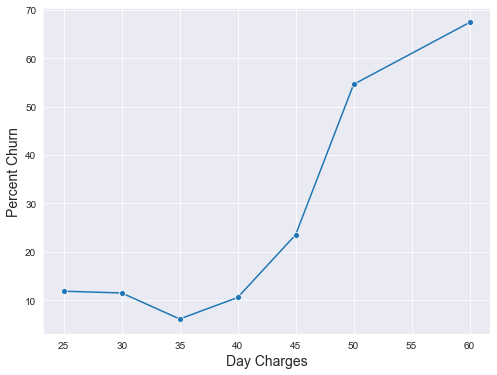

In [79]:
# plot churn rate for each $5 increase in day charges
plt.figure(figsize=(8,6))
sns.lineplot(x=x2, y=day_charge, marker="o")
plt.xlabel('Day Charges', size=14)
plt.ylabel('Percent Churn', size=14)
fig5 = plt.gcf()
plt.show()

In [80]:
# caculate the day call charges proportion against total charges
day_charge_sum = sum(df_churned.total_day_charge)
total_net_charge_sum = sum(df_churned.total_net_charge)
day_charge_sum / total_net_charge_sum

0.5382205364918289

In [81]:
# calculate how many clients are making day calls
sum(df.total_day_charge != 0) / len(df.total_day_charge )

0.9993999399939995

After a further look into the breakdown of charges, 99.9% of all clients make day time phone calls and 52% of all phone call charges come from day calls. Clients spending $40 or more are more likely to churn.

In [82]:
df_churned['international_plan'].value_counts(normalize=True) * 100

0    71.635611
1    28.364389
Name: international_plan, dtype: float64

In [83]:
# create a new data frame with only the clients with intl plans
df_intl = df[df.international_plan != 1]

In [84]:
df_intl['cost_per_intl_call'] = df_intl['total_intl_charge'] / df_intl['total_intl_minutes']
intl_call_per_min2 = np.mean(df_intl['cost_per_intl_call'])
print(f'International Cost/Min: ${round(intl_call_per_min2, 2)}')

International Cost/Min: $0.27


It is clear that the customers who churned and those that did not churn had almost exactly the same usage across day, eve, night and international calls. The rates for international minutes are the same regardless of whether the customer has an international plan or not (27 cents per minute). It is also interesting to note that the percentage of customers who churned was higher for customers with international plans than for customers without international plans. Because of this similar charge for international calls, it is possible that the customers who had an international plan and churned did not feel that paying for the international plan was worth it.


Based on these findings, the recommendation is to change the rates for international minutes. If a customer has an international plan, they should have cheaper rates for international calls than a customer without an international plan.

##### Investigate Correlation between different variables

In [85]:
corr_matrix = df.corr()
corr_matrix['churn'].sort_values(ascending=False)

churn                     1.000000
international_plan        0.259852
total_net_charge          0.231549
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_net_minutes         0.198607
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_net_calls           0.015807
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
cost_per_intl_call       -0.001715
cost_per_night_call      -0.003009
cost_per_day_call        -0.007103
cost_per_eve_call        -0.008959
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
voice_mail_plan          -0.102148
Name: churn, dtype: float64

In [86]:
corr_matrix = df.corr()
corr_matrix

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_intl_charge,customer_service_calls,churn,cost_per_day_call,cost_per_intl_call,cost_per_night_call,cost_per_eve_call,total_net_charge,total_net_minutes,total_net_calls
account_length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,...,0.009546,-0.003796,0.016541,-0.000073,0.006221,-0.009487,0.026133,0.001454,-0.004785,0.027542
area_code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,...,-0.018395,0.027572,0.006174,-0.009105,-0.024514,-0.008893,0.032689,-0.008393,-0.006828,-0.004836
international_plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,...,0.045780,-0.024522,0.259852,0.016647,-0.018257,-0.015902,0.006415,0.048415,0.025850,0.014037
voice_mail_plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,...,-0.001276,-0.017824,-0.102148,-0.027948,0.012561,-0.016235,0.015298,0.008585,0.014503,-0.000807
number_vmail_messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,...,0.002884,-0.013263,-0.089728,-0.031363,0.008435,-0.018974,0.019557,0.009766,0.014779,-0.003911
total_day_minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,...,-0.010092,-0.013423,0.205151,-0.027128,0.011097,-0.022404,-0.019943,0.884754,0.611587,0.026676
total_day_calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,...,0.021666,-0.018942,0.018459,-0.006811,0.016938,-0.008315,0.011130,0.003673,0.005559,0.575542
total_day_charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,...,-0.010094,-0.013427,0.205151,-0.026918,0.011096,-0.022414,-0.019947,0.884757,0.611591,0.026678
total_eve_minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,...,-0.011067,-0.012985,0.092796,0.017592,-0.006197,0.001652,-0.030188,0.413143,0.560621,-0.014617
total_eve_calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,...,0.008674,0.002423,0.009233,0.001509,-0.005190,0.025952,0.005539,0.009392,0.002198,0.587726


<AxesSubplot:>

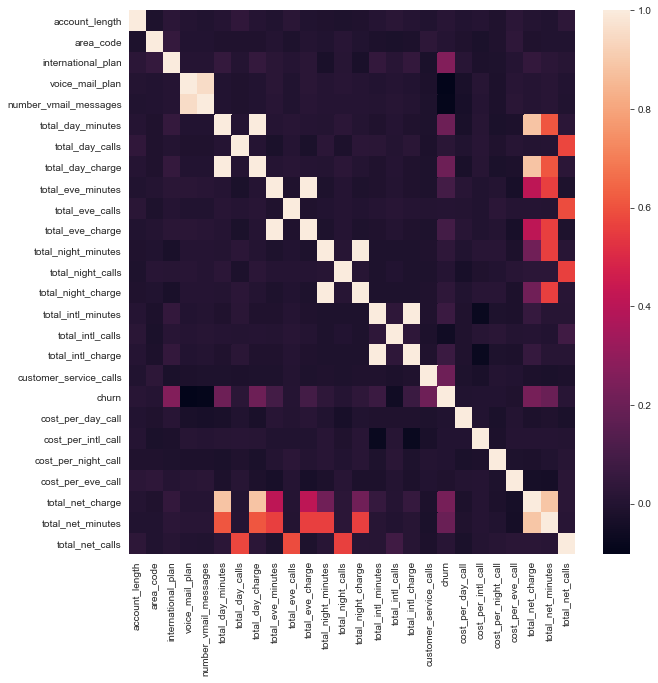

In [87]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,data = df)

##### Addressing multicolinaraty 

In [88]:
df.drop(columns=['total_day_minutes', 'total_night_minutes', 'total_eve_minutes', 
                 'total_intl_minutes', 'cost_per_day_call', 'cost_per_intl_call', 
                 'cost_per_night_call', 'cost_per_eve_call', 'total_net_charge', 
                 'total_net_minutes', 'total_net_calls'], inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   category
 1   account_length          3333 non-null   int64   
 2   area_code               3333 non-null   int64   
 3   international_plan      3333 non-null   int64   
 4   voice_mail_plan         3333 non-null   int64   
 5   number_vmail_messages   3333 non-null   int64   
 6   total_day_calls         3333 non-null   int64   
 7   total_day_charge        3333 non-null   float64 
 8   total_eve_calls         3333 non-null   int64   
 9   total_eve_charge        3333 non-null   float64 
 10  total_night_calls       3333 non-null   int64   
 11  total_night_charge      3333 non-null   float64 
 12  total_intl_calls        3333 non-null   int64   
 13  total_intl_charge       3333 non-null   float64 
 14  customer_service_calls  

<AxesSubplot:>

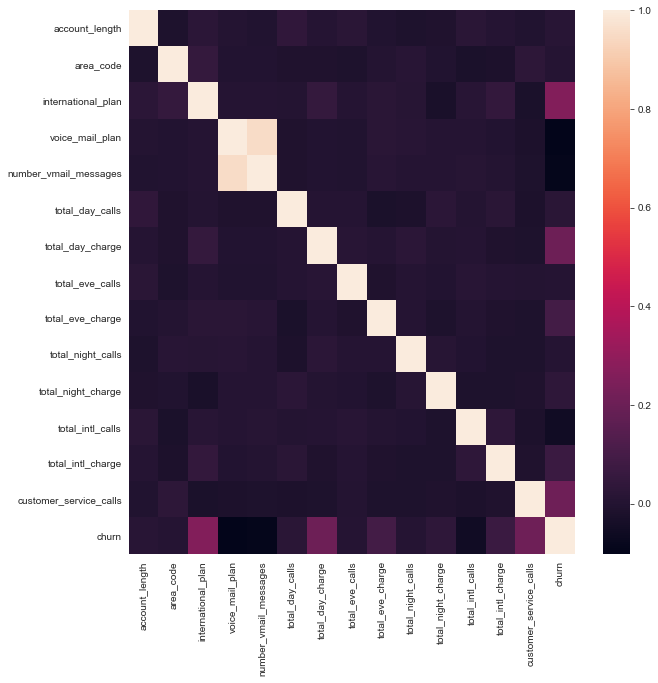

In [90]:
corr_matrix = df.corr()
corr_matrix
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,data = df)

In [91]:
corr_matrix = df.corr()
corr_matrix['churn'].sort_values(ascending=False)

churn                     1.000000
international_plan        0.259852
customer_service_calls    0.208750
total_day_charge          0.205151
total_eve_charge          0.092786
total_intl_charge         0.068259
total_night_charge        0.035496
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
voice_mail_plan          -0.102148
Name: churn, dtype: float64

### Data

In this sample dataset of the population of SyriaTel clients, the churn rate is 14.5%. The number one reason of churn in the telecom industry is customer service issues. By identifying the early indicators of customer dissatisfaction and addressing them boldly to achieve utmost customer satisfaction.

Using a Pearson's correlation, the following features had the highest correlations to churn

1. total_net_charge         
2. customer_service_calls    
3. total_day_minutes         

The Pearson correlation coefficient only measures linear correlations, thus categorical features were not addressed. 

## Modeling

In [92]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, plot_confusion_matrix

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    print(f'Accuracy Score: {round(accuracy_score(y, y_pred), 2)}')
    print(f'Recall Score: {round(recall_score(y, y_pred), 2)}')
    print(f'Precision Score: {round(precision_score(y, y_pred), 2)}')
    print(f'F1 Score: {round(f1_score(y, y_pred), 2)}')
    plot_confusion_matrix(model, X, y,cmap="Reds")

### Model 1: Buidling a Vanilla Model using Logistic Regression

In [93]:
X0 = df.drop(['state','churn'], axis=1)
y0 = df['churn']

In [94]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.25, random_state=42)

In [95]:
# Instantiate LogisticRegression 
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X0_train, y0_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [96]:
# Function to calculate Recall
def recall(y0, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y0, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

In [97]:
y_hat_train = logreg.predict(X0_train)
y_hat_test = logreg.predict(X0_test)

In [98]:
print('Training Recall: ', recall(y0_train, y_hat_train) * 100)
print('Testing Recall: ', recall(y0_test, y_hat_test) * 100)

Training Recall:  20.949720670391063
Testing Recall:  14.399999999999999


In [99]:
print('Training Recall: ', recall_score(y0_train, y_hat_train) * 100)
print('Testing Recall: ', recall_score(y0_test, y_hat_test) * 100)

Training Recall:  20.949720670391063
Testing Recall:  14.399999999999999


In [100]:
print('Training Accuracy: ', accuracy_score(y0_train, y_hat_train) * 100)
print('Testing Accuracy: ', accuracy_score(y0_test, y_hat_test) * 100)

Training Accuracy:  86.5546218487395
Testing Accuracy:  85.73141486810552


Accuracy Score: 0.86
Recall Score: 0.14
Precision Score: 0.6
F1 Score: 0.23


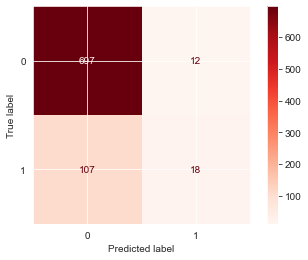

In [144]:
evaluate_model(model_log, X0_test, y0_test)

### Model 2: K-Nearest Neighbors

In [102]:
X4 = df.drop(['state','churn'], axis=1)
y4 = df['churn']

In [103]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=42)

In [104]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X4_train)
scaled_data_test = scaler.transform(X4_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X4.columns)
scaled_df_train.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls
0,-1.404508,-0.512381,-0.327448,-0.611418,-0.584700,1.330852,-1.884170,0.401340,1.037905,0.004940,1.071757,-0.595235,2.767357,-0.427903
1,0.366388,-0.512381,-0.327448,-0.611418,-0.584700,0.529165,0.293703,0.401340,0.517286,0.670832,2.212569,-1.417963,1.045965,0.324616
2,0.518179,-0.679077,-0.327448,1.635543,1.685101,-1.875896,1.056666,0.849774,0.094283,-0.763398,-0.077797,0.227493,-0.053077,1.829653
3,2.010792,-0.512381,-0.327448,-0.611418,-0.584700,1.681590,-0.679320,0.650470,-0.403094,-0.660953,-0.322569,-0.183871,-0.053077,-0.427903
4,0.290493,1.749923,-0.327448,-0.611418,-0.584700,1.080325,0.484172,-0.296224,-0.719184,0.056162,-1.188013,1.050221,0.834102,1.077134


In [105]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y4_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [106]:
# Complete the function
from sklearn.metrics import f1_score
def print_metrics(y4, preds):
    print("Precision Score: {}".format(precision_score(y4, preds) * 100))
    print("Recall Score: {}".format(recall_score(y4, preds) * 100))
    print("Accuracy Score: {}".format(accuracy_score(y4, preds) * 100))
    print("F1 Score: {}".format(f1_score(y4, preds) * 100))
    
print_metrics(y4_test, test_preds)

Precision Score: 73.91304347826086
Recall Score: 27.200000000000003
Accuracy Score: 87.64988009592327
F1 Score: 39.76608187134503


In [107]:
def find_best_k(X4_train, y4_train, X4_test, y4_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X4_train, y4_train)
        preds = knn.predict(X4_test)
        recall1 = recall_score(y4_test, preds)
        if recall1 > best_score:
            best_k = k
            best_score = recall1
    
    print("Best Value for k: {}".format(best_k))
    print("Recall: {}".format(best_score))

In [108]:
find_best_k(scaled_data_train, y4_train, scaled_data_test, y4_test)

Best Value for k: 1
Recall: 0.472


Accuracy Score: 0.88
Recall Score: 0.27
Precision Score: 0.74
F1 Score: 0.4


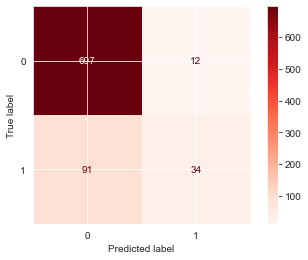

In [143]:
evaluate_model(clf, scaled_data_test, y4_test)

The Recall score for the KNN Model definitely improved compared to the Logistic Model.

### Model 3: Random Forest Model

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   category
 1   account_length          3333 non-null   int64   
 2   area_code               3333 non-null   int64   
 3   international_plan      3333 non-null   int64   
 4   voice_mail_plan         3333 non-null   int64   
 5   number_vmail_messages   3333 non-null   int64   
 6   total_day_calls         3333 non-null   int64   
 7   total_day_charge        3333 non-null   float64 
 8   total_eve_calls         3333 non-null   int64   
 9   total_eve_charge        3333 non-null   float64 
 10  total_night_calls       3333 non-null   int64   
 11  total_night_charge      3333 non-null   float64 
 12  total_intl_calls        3333 non-null   int64   
 13  total_intl_charge       3333 non-null   float64 
 14  customer_service_calls  

In [111]:
#train,test split
X = df.drop(['state','churn'], axis=1)
y = df['churn']

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.3,random_state = 42)
X_train.shape, X_test.shape

((2333, 14), (1000, 14))

In [112]:
y_train.shape

(2333,)

In [113]:
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(random_state = 42)
for_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [114]:
predict = for_reg.predict(X_test)

In [115]:
predict

array([0.02, 0.  , 1.  , 0.1 , 0.  , 0.  , 0.05, 0.02, 0.01, 0.01, 0.  ,
       0.01, 0.  , 0.94, 0.16, 0.15, 0.02, 0.73, 0.15, 0.01, 0.12, 0.04,
       0.09, 0.36, 0.01, 0.  , 0.04, 0.41, 0.02, 0.09, 0.02, 0.15, 0.13,
       0.01, 0.02, 0.06, 0.02, 0.08, 1.  , 0.35, 0.  , 0.05, 0.04, 0.24,
       0.04, 0.  , 0.78, 0.56, 0.01, 0.01, 0.13, 0.72, 0.22, 0.06, 0.06,
       0.03, 0.03, 0.04, 0.01, 0.04, 0.46, 0.08, 0.15, 0.05, 0.  , 0.1 ,
       0.08, 0.25, 1.  , 0.07, 0.49, 0.01, 0.07, 0.95, 0.13, 0.02, 0.04,
       0.  , 1.  , 0.03, 0.03, 0.11, 0.  , 0.04, 0.  , 0.05, 0.02, 0.02,
       0.  , 0.91, 0.01, 0.95, 0.91, 0.15, 0.  , 0.74, 0.2 , 0.  , 0.08,
       0.02, 0.  , 0.01, 0.04, 0.05, 0.01, 0.02, 0.01, 0.16, 0.07, 0.15,
       0.02, 0.01, 0.01, 0.  , 0.  , 0.03, 0.07, 0.06, 0.37, 0.11, 0.09,
       0.04, 0.07, 0.  , 0.1 , 0.17, 0.76, 0.9 , 0.01, 0.01, 0.02, 0.04,
       0.04, 0.  , 0.01, 0.  , 0.06, 0.  , 0.24, 0.04, 0.01, 0.07, 0.02,
       0.27, 0.01, 0.25, 0.02, 0.07, 1.  , 0.02, 0.

In [116]:
accuracy_score(predict.round(),y_test)

0.953

In [117]:
recall_score(predict.round(), y_test)

0.9444444444444444

In [118]:
mse = mean_squared_error(predict.round(),y_test)

In [119]:
rmse = np.sqrt(mse)
rmse

0.216794833886788

The recall score for the RandomForest Model looks very promising, lets improve the model

##### Fine-Tune Model using GridSearch

In [121]:
param_grid = [{'n_estimators':[10,100,1000] ,'max_features':[2,4,6,8,16]}]      

In [122]:
param_grid

[{'n_estimators': [10, 100, 1000], 'max_features': [2, 4, 6, 8, 16]}]

In [123]:
grid_search = GridSearchCV(for_reg,param_grid,cv = 3,scoring = 'neg_mean_squared_error',return_train_score = True,n_jobs = 3)

In [124]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=3,
             param_grid=[{'max_features': [2, 4, 6, 8, 16],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [125]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 1000}

In [126]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=1000, random_state=42)

In [127]:
y_pred = grid_search.predict(X_test)

In [128]:
y_pred = y_pred.round()

In [129]:
score = accuracy_score(y_pred,y_test)

In [130]:
print( "Accuracys is"+" "+ str(score*100),"%")

Accuracys is 95.39999999999999 %


In [131]:
recall_score = recall_score(y_pred, y_test)

In [133]:
print( "Recall is"+" "+ str(recall_score*100),"%")

Recall is 95.32710280373831 %


##### Feature Importance

In [134]:
# Feature importance
for_reg.feature_importances_

array([0.02869585, 0.00840487, 0.07720959, 0.03020876, 0.03427118,
       0.02847854, 0.2616167 , 0.0289946 , 0.12765987, 0.0321008 ,
       0.05388318, 0.08100447, 0.0930967 , 0.1143749 ])

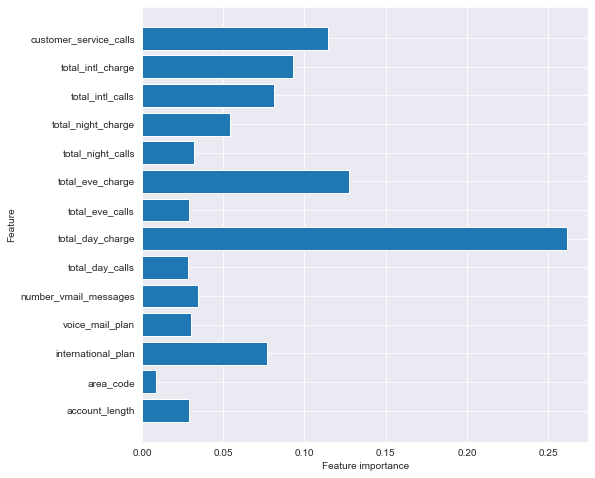

In [135]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(for_reg)

Using Feature Importance, we can see that total day charge is the most important feature, we can assume that total net charges are the most important, followed by number of customer service calls, and whether a customer has an international plan or not.

### Model 4: XGBoost

In [136]:
#train,test split
X3 = df.drop(['state','churn'], axis=1)
y3 = df['churn']

X3_train,X3_test,y3_train,y3_test = train_test_split(X3, y3,test_size = 0.3,random_state = 42)
X3_train.shape, X3_test.shape

((2333, 14), (1000, 14))

In [140]:
# Instantiate XGBClassifier
clf1 = XGBClassifier()

# Fit XGBClassifier
clf1.fit(X3_train, y3_train)

# Predict on training and test sets
training_preds = clf1.predict(X3_train)
test_preds = clf1.predict(X3_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y3_train, training_preds)
test_accuracy = accuracy_score(y3_test, test_preds)

# Recall of training and test sets
training_recall = recall_score(y3_train, training_preds)
test_recall = recall_score(y3_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

print('Training Recall: {:.4}%'.format(training_recall * 100))
print('Validation Recall: {:.4}%'.format(test_recall * 100))

[12:38:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.0%
Validation accuracy: 95.6%
Training Recall: 100.0%
Validation Recall: 74.13%


Accuracy Score: 0.96
Recall Score: 0.74
Precision Score: 0.94
F1 Score: 0.83


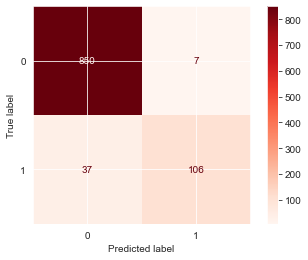

In [142]:
evaluate_model(clf1, X3_test, y3_test)

The recall score improved compared to the KNN Model, but did worse than the RandomForest model. Hence the final and best model should be the RandomForest model, which had a recall score of 95.32%

## Conclusions

The importance of this type of research in the telecom market is to help companies make more profit. It has become known that predicting churn is one of the most important sources of income to telecom companies. Hence, this research aimed to build a system that predicts the churn of customers in SyriaTel telecom company. Four seperate models were created, 

1. Logistic Regression 
2. K-Nearest Neighbors
3. Random Forest
4. XG Boost

Our Random forest model had the highest recall score of 95.32% and was chosen to be the best and final model. 

### Recommendations

Based on the feature analysis and the results from the final model it is clear that customer service calls and day call charges have the strongest impact on customer churn. SyriaTel can do the following to reduce churn:

1. Customers who called customer service more than three times should be reviewed with more importance. Track metrics from customer service calls. Are clients calling about the same issues? Once we know why these clients are calling we can better alleviate their pain by addressing and correcting these issues.

2. Re-evaluate pricing structure for day calls. Consider a tiered pricing structure past a certain dollar amount

3. The international plan is not marketed effectively less than 10% of customers have the international plan and are paying the same rate as customers without the plan. The international plan has to be updated